Text(0.5, 1.0, 'log loss (l2)')

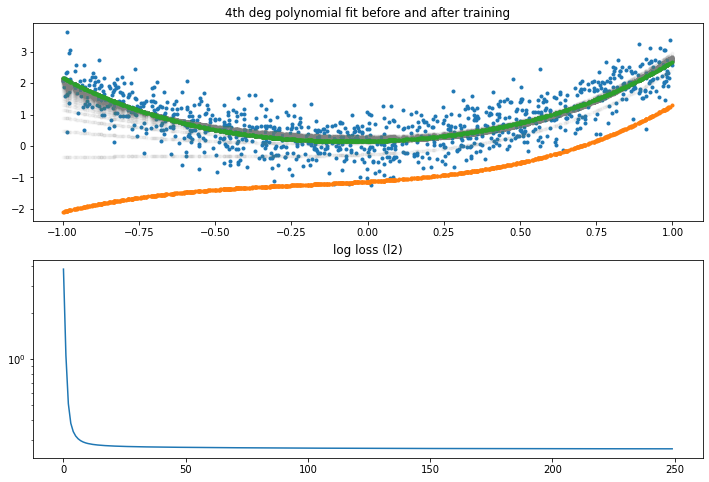

In [136]:
import numpy as np
import matplotlib.pyplot as plt



def memoize(fun):
    
    memory = dict()
    
    def wrapperfun(*args):
        k = tuple(args[1])
        if k in memory:
            return memory[k]
        else:
            memory[k] = fun(*args)
            return memory[k]
        
    return wrapperfun


def logging(fun):
    global log
    log = []
    def wrapperfun(*args):
        log.append(fun(*args))
        return log[-1]
    
    return wrapperfun


class Polynomial(object):
    
    def __init__(self,degree):
        
        self.degree = degree
        self.coefs = np.random.randn(self.degree+1)
        
    @memoize
    def powers(self,x):
        return np.vstack([x**i for i in range(self.degree+1)])

    def predict(self,x):
        return np.dot(self.coefs,self.powers(x))
    
    @logging
    def l2loss(self,x,y):
        return np.mean((self.predict(x)-y)**2)
    
    def gradient(self,x,y):
        return 2*np.mean((self.predict(x)-y)*self.powers(x),axis=1)
    
    def descend(self,x,y,learning_rate=0.1):
        _ = self.l2loss(x,y)
        self.coefs = self.coefs - learning_rate*self.gradient(x,y)
        
        return None
    

    
# make data  
a = 0.1
b = 0.23
c = 2.2
sig = 0.5

x = np.random.uniform(-1,1,1000)
y = a + b*x + c*x**2 + sig*np.random.randn(*x.shape)
    
# initiate model    
model = Polynomial(4)


ax1,ax2 = plt.subplots(2,figsize=(12,8))[1]
ax1.plot(x,y,'.')
ax1.plot(x,model.predict(x),'.')

for i in range(250):
    model.descend(x,y,learning_rate=0.25)
    ax1.plot(x,model.predict(x),'.',alpha=0.025,color='gray')
    
ax1.plot(x,model.predict(x),'.')
ax1.set_title('%ith deg polynomial fit before and after training' % model.degree)

ax2.semilogy(log)
ax2.set_title('log loss (l2)')